# BoxSort for Sorting a Square Matricies

This notebook is intended to show what and how the *BoxSort* class works.

*BoxSort* creates the sorted matricies that are cut by [BoxCut class](https://github.com/peterwinter/boxcluster_tutorial/blob/master/boxcut.ipynb) into several "boxes".

The diagonal is a line of symetry. This method optimizes position so high affinity positions are closest to the line of symetry. ie. every node is closest to it's strongest connections. ie. the matrix is sorted.

On the surface this seems complicated, so an example might help.

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# global imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# the boxcluster package
from boxcluster import BoxSort
from boxcluster.fake_data import generate_nested_data

In [6]:
# local imports
from plotting import mplot


### Load Sample Data

To test out this function we load a sample dataset that contains the type of structures we are looking for.
The data is represented as a square 64 x 64 *numpy array* with values between 0 and 1.

It's a numpy array, we're just plotting it visually here.

Solution


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


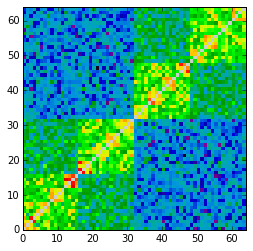

In [7]:
test_soln = generate_nested_data(noise=0.05)
print('Solution')
mplot(test_soln)
plt.show()

### Make Test Set

Shuffle the rows so that the algorithm can try to reassemble the pieces.

Test


/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


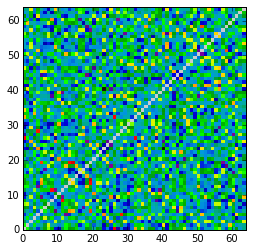

In [9]:
n = len(test_soln)
order = np.arange(n)
np.random.shuffle(order)
test = test_soln[:, order][order, :]
print('Test')
mplot(test)

# BoxSort Example

hey

/Users/peterwinter/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


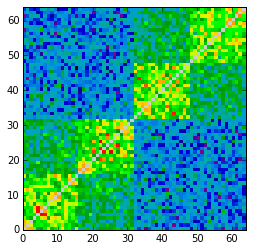

In [10]:
# initialize the instance
bs = BoxSort(test)

# returns a OrderedArray class object with the solution.
result = bs(save_history=True)

# show result
mplot(result.matrix)
plt.show()

# Under The Hood

### Introspecting History

Because we ran **bc** using while saving history, `bc(save_history=True)`, we've got a list of namedtuples (from collections) that let us introspect how the simulated annealing algorithm ran. 

Each of the named tuple (called a *trace*) contains seven elements:
- evals (a counter)
- last_move (turns since move was accepted)
- move_accepted (boolean, some moves are stored but not accepted)
- temp (current temperature)
- current_fit (fitness/energy of current state)
- new_fit (fitness/energy of proposed move)

In [13]:
history = bs.history
history[:3]

[trace(evals=0, last_move=0, moves_this_temp=1, move_accepted=True, temp=0.001, current_fit=1078.6248008339596, new_fit=1080.8021107200407),
 trace(evals=1, last_move=0, moves_this_temp=1, move_accepted=True, temp=0.0009900448802097482, current_fit=1080.8021107200407, new_fit=1081.1692464273292),
 trace(evals=2, last_move=1, moves_this_temp=2, move_accepted=True, temp=0.0009900448802097482, current_fit=1081.1692464273292, new_fit=1081.1692464273292)]

This can conveniently turned into a dataframe and used for plotting

In [14]:
df = pd.DataFrame(history).set_index('evals')
df.head()

,last_move,moves_this_temp,move_accepted,temp,current_fit,new_fit
evals,,,,,,
0,0,1,True,0.00100,1078.624801,1080.802111
1,0,1,True,0.00099,1080.802111,1081.169246
2,1,2,True,0.00099,1081.169246,1081.169246
3,2,3,True,0.00099,1081.169246,1081.169246
4,0,4,True,0.00099,1081.169246,1081.234786


### Maximizing Value along diagonal

We can check how well we maximize this fitness function

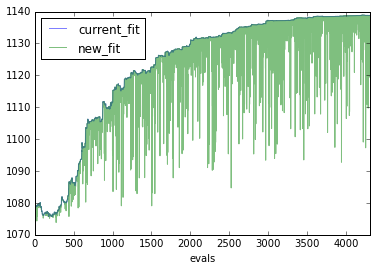

In [11]:
df[['current_fit', 'new_fit']].plot(alpha=0.5)

### Halting Condition

Examine all the properties involved with progressing for this anneal.

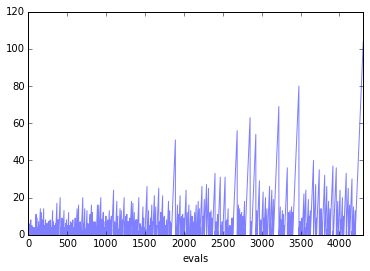

In [9]:
df['last_move'].plot(alpha=0.5)

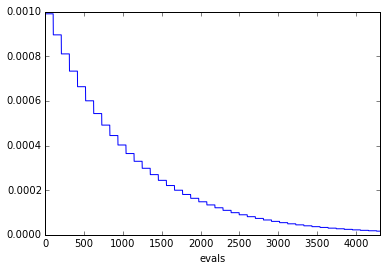

In [10]:
df['temp'].plot()

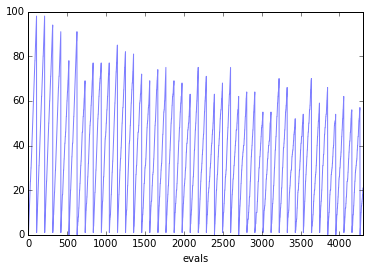

In [8]:
df['moves_this_temp'].plot(alpha=0.5)

In [ ]:

random_order = np.arange(len(test_soln))
np.random.shuffle(random_order)
random_order

m = self.reorder(order=random_order)
mplot(m)
self.order[self.inverse_order()], self.order


inverse = self.inverse_order()
m2 = m[inverse, :][:, inverse]
mplot(m2)

m = self.matrix
mplot(m)
m = self.origional_matrix()
mplot(m)

In [ ]:
mat, new_ord = bo2.propose_move()
print(bo2.fitness, bo.fitness)
mplot(mat)
mplot(bo.matrix)
mplot(test_soln)